In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [171]:
def pca_graph(N, sensor_values, df):
    pca = PCA(n_components=N)
    components = pca.fit_transform(sensor_values)
    principalDf = pd.DataFrame(data=components, columns=['pc1', 'pc2'])
    finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


    fig, ax= plt.subplots()
    ax.set_xlabel('PC 1', fontsize = 10)
    ax.set_ylabel('PC 2', fontsize = 10)
    targets = ['healthy', 'azotemic', 'healthy-test', 'azotemic-test']
    colors = ['#00ff22', '#f6ff00', '#000dff', '#ff0000']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        m = 'x' if 'test' in target else '.'
        ax.scatter(finalDf.loc[indicesToKeep, 'pc1'], finalDf.loc[indicesToKeep, 'pc2'], c = color, s = 50, marker=m)
    ax.legend(targets)
    ax.grid()
    plt.xlim(-5, 5)
    plt.ylim(-3, 3)
    plt.show()
    return finalDf

In [144]:
def knn(N, X_train, X_test, y_train):
    #Feature Scaling
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    #Training and Prediction
    classifier = KNeighborsClassifier(n_neighbors=N, weights='distance')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return classifier, y_pred

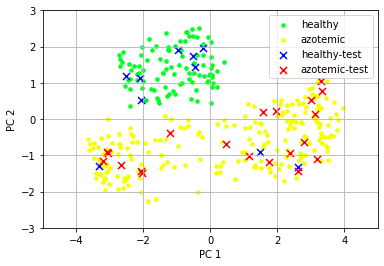

In [172]:
sensors = ['MQ2','MQ3','MQ4','MQ6','MQ7','MQ8','MQ135']
df = pd.read_csv('_dataset.csv', error_bad_lines=False)
val = df.loc[:, sensors].values
val = StandardScaler().fit_transform(val)
pcaDf = pca_graph(2, val, df)

In [146]:
dataTrain = (df['target'] == 'healthy') | (df['target'] == 'azotemic')
dataTest = (df['target'] == 'healthy-test') | (df['target'] == 'azotemic-test')
trainDf = pcaDf.loc[dataTrain]
testDf = pcaDf.loc[dataTest]
testDf['target'] = testDf['target'].replace(['healthy-test'], 'healthy')
testDf['target'] = testDf['target'].replace(['azotemic-test'], 'azotemic')
testDf
X_train = trainDf.iloc[:, :-1].values
y_train = trainDf.iloc[:, 2].values
X_test = testDf.iloc[:, :-1].values
y_test = testDf.iloc[:, 2].values

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [147]:
classifier, y_pred = knn(5, X_train, X_test, y_train)

In [148]:
print(confusion_matrix(y_test, y_pred))

[[20  0]
 [ 3  7]]


In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    azotemic       0.87      1.00      0.93        20
     healthy       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.93      0.85      0.88        30
weighted avg       0.91      0.90      0.89        30



In [176]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

x_min, x_max, y_min, y_max, h = -5, 5, -3, 3, 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
Z = Z.reshape(xx.shape)
converter = lambda t: t == 'healthy'
vfunc = np.vectorize(converter)
vfunc(Z)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.show()

TypeError: iteration over a 0-d array

<Figure size 432x288 with 1 Axes>

[1 1 1 ... 2 2 2]


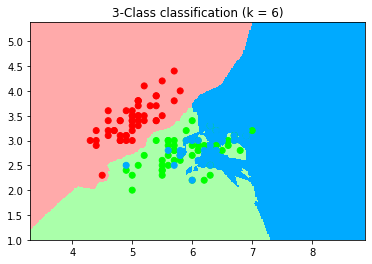

In [170]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 6

# import some data to play with
iris = datasets.load_iris()

# prepare data
X = iris.data[:, :2]
y = iris.target
h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()
